In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

In [2]:

HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

ccnpalette = [PCOLOR, HCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'DON', 'RDON', 'DIN']
cccpalette = [PCOLOR, HCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [3]:
mpalette = sns.color_palette('Accent', n_colors=8).as_hex()
#mpalette = [mpalette[0]] + mpalette[4:7]

AXENIC_COLOR = '#47B07B' # axenic (green ) 
COCULTURE = '#7D7D7D' # co-culture (grey) #7D7D7D
CC_COLOR = '#1B73D3'
#9479b9
PRO_COLOR = 'MediumSeaGreen'
ALT_COLOR = 'Gold'
mpalette = [PRO_COLOR,ALT_COLOR, AXENIC_COLOR, COCULTURE, CC_COLOR ]
torder = ['med4', 'co-culture']
tpal = [PCOLOR_light, PRO_COLOR]
forder = ['med4 (AX)', 'med4 (CC)', '1A3 (CC)', '1A3 (AX)']
fpal = [PCOLOR_light, PRO_COLOR, HCOLOR, HCOLOR_light,  ]

sns.color_palette(fpal)

[(0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (0.23529411764705882, 0.7019607843137254, 0.44313725490196076),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.9921568627450981, 0.6509803921568628, 0.36470588235294116)]

In [4]:
sorder = ['P0A', 'P0B', 'P0C', 'A0A', 'A0B', 'A0C', 'C0A', 'C0B', 'C0C',
       'P1A', 'P1B', 'P1C', 'A1A', 'A1B', 'A1C', 'C1A', 'C1B', 'C1C',
       'P2A', 'P2B', 'P2C', 'A2A', 'A2B', 'A2C', 'C2A', 'C2B', 'C2C',
       'P3A', 'P3B', 'P3C', 'A3A', 'A3B', 'A3C', 'C3A', 'C3B', 'C3C']



In [5]:
data_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='FL').T.reset_index(drop=True)


In [6]:
data2_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='TP').T.reset_index(drop=True)


In [7]:
data3_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='transfer p2').T.reset_index(drop=True)
data4_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='transfer c3').T.reset_index(drop=True)
data5_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='transfer c4').T.reset_index(drop=True)
data7_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='transfer c5').T.reset_index(drop=True)
data6_df = pd.read_excel(os.path.join('data', 'osnat cc1a3 FL.xlsx'), 
              index_col='date', sheet_name='MED4 REPEAT', skiprows=2).T.reset_index(drop=True)


In [8]:
mdf1 = pd.melt(data_df, id_vars='day', var_name='Sample', value_name='FL')
mdf2 = pd.melt(data2_df, id_vars='day', var_name='Sample', value_name='FL')
mdf3 = pd.melt(data3_df, id_vars='day', var_name='Sample', value_name='FL')
mdf4 = pd.melt(data4_df, id_vars='day', var_name='Sample', value_name='FL')
mdf5 = pd.melt(data5_df, id_vars='day', var_name='Sample', value_name='FL')
mdf6 = pd.melt(data6_df, id_vars='day', var_name='Sample', value_name='FL')
mdf7 = pd.melt(data7_df, id_vars='day', var_name='Sample', value_name='FL')


In [9]:
df = pd.concat([mdf1, mdf2, mdf6])
trans_df = pd.concat([mdf3, mdf4, mdf5, mdf7])

In [10]:
d = df.Sample.str.split('', expand=True)
df['treatment'] = d[1].map({'P': 'med4', 'A': '1A3', 'C': 'co-culture'})
df['timepoint'] = d[2]
df['replicate'] = d[3]

In [11]:
d = trans_df.Sample.str.split('', expand=True)
trans_df['treatment'] = d[1].map({'P': 'med4', 'A': '1A3', 'C': 'co-culture'})
trans_df['timepoint'] = d[2].map({'0': '11', '3': '31', '4': '60', '5': '88' })
trans_df['replicate'] = d[3]
trans_df['name'] = trans_df['treatment'] + ' @' + trans_df['timepoint']


In [12]:
df['omics'] = False
df.loc[df.timepoint.isin(['3','4','6']), 'omics'] = True
df.loc[df.timepoint.isin(['1','2']) & df.treatment.isin(['1A3', 'co-culture']), 'omics'] = True
df.loc[(df.timepoint  == '7') & (df.day >13.5), 'omics'] = True



In [13]:
df.columns

Index(['day', 'Sample', 'FL', 'treatment', 'timepoint', 'replicate', 'omics'], dtype='object')

In [14]:
df = df.groupby(['day', 'Sample', 'treatment', 'timepoint', 'replicate', 'omics'])['FL'].mean().reset_index()

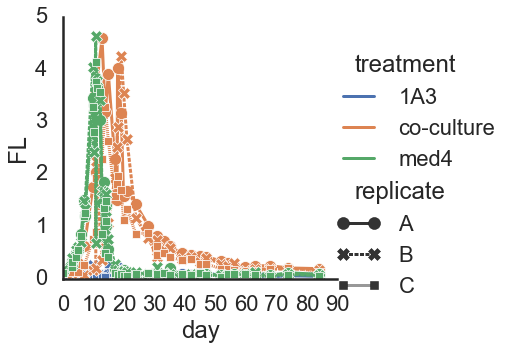

In [15]:
sns.relplot(data=df, x='day', y='FL', hue='treatment', style='replicate', markers=True,
           kind='line', ci='sd')

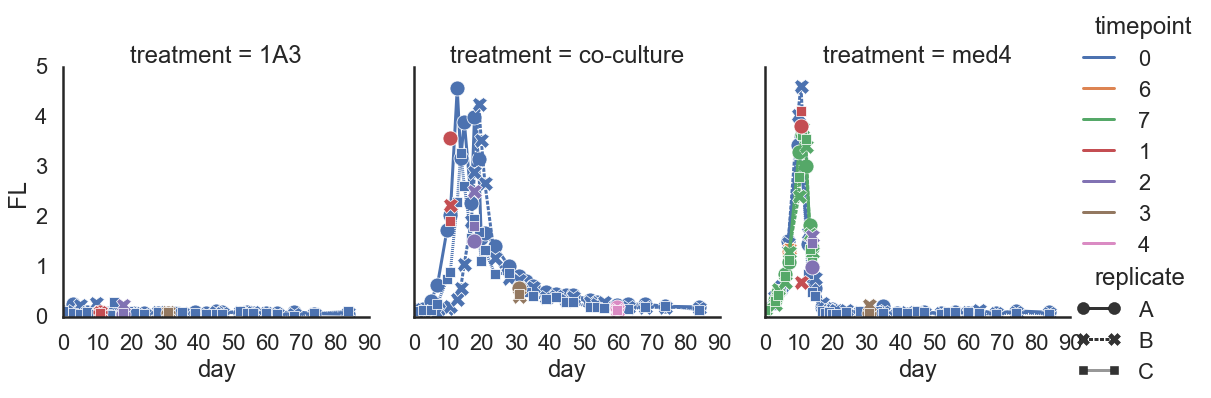

In [16]:
sns.relplot(data=df, x='day', y='FL', col='treatment', style='replicate', markers=True, 
            estimator=None, units='Sample',
            hue='timepoint', markersize=15,
           kind='line', #ci='sd'
           )

Text(0.5, 1.0, 'med4')

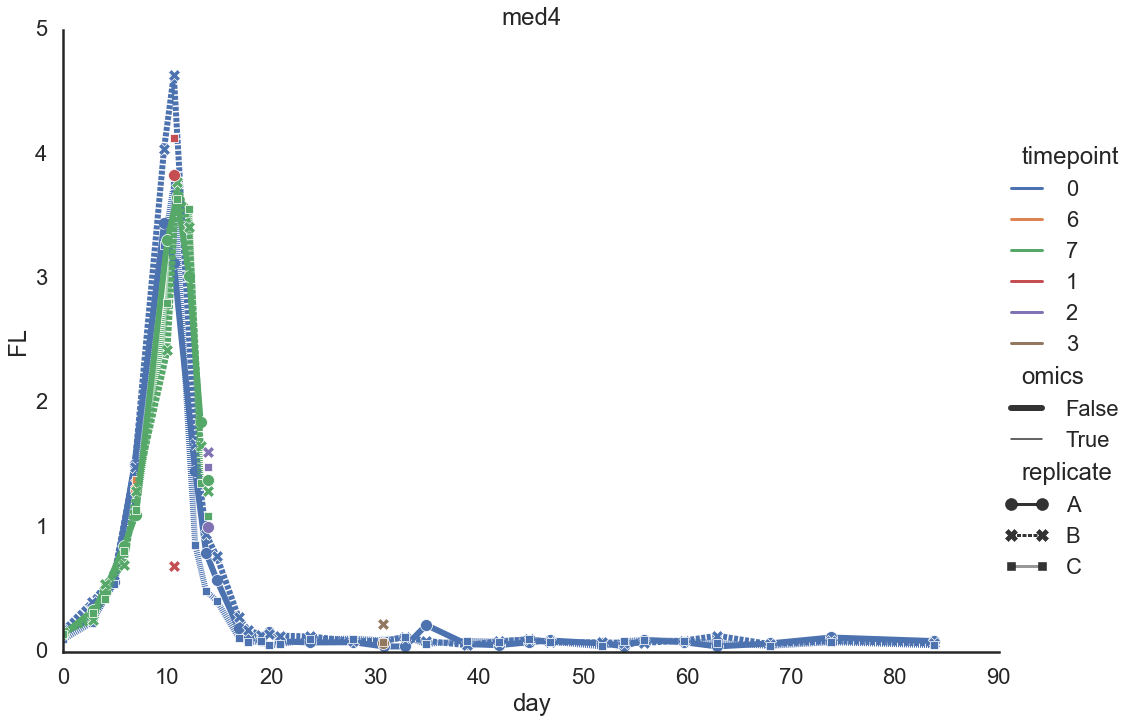

In [17]:
sns.relplot(data=df.loc[df.treatment.isin(['med4'])]
            , x='day', y='FL', 
            style='replicate', markers=True, 
            estimator=None, units='Sample',
            hue='timepoint', #markersize=15,
            size='omics', lw=1,
           kind='line', #ci='sd'
            height=10, aspect=1.4,
           )
plt.title('med4')

Text(0.5, 1.0, 'med4')

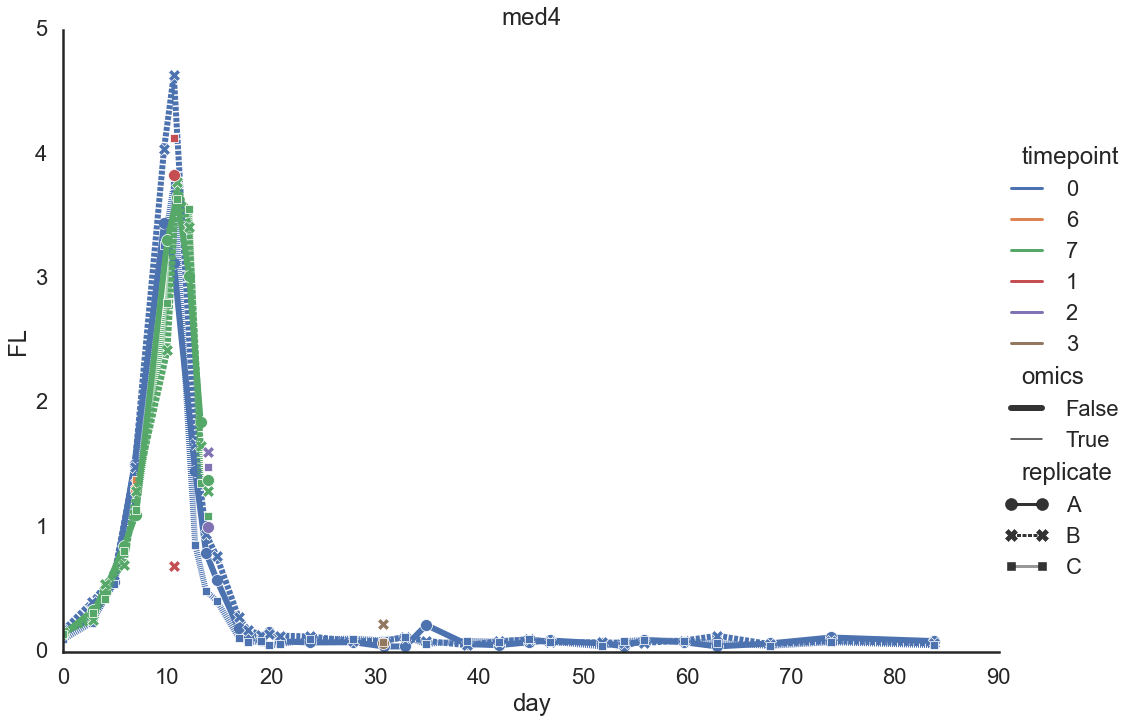

In [18]:
sns.relplot(data=df.loc[df.treatment.isin(['med4'])]
            , x='day', y='FL', 
            style='replicate', markers=True, 
            estimator=None, units='Sample',
            hue='timepoint', #markersize=15,
            size='omics', lw=1,
           kind='line', #ci='sd'
            height=10, aspect=1.4,
           )
plt.title('med4')

Text(0.5, 1.0, 'med4 + 1A3')

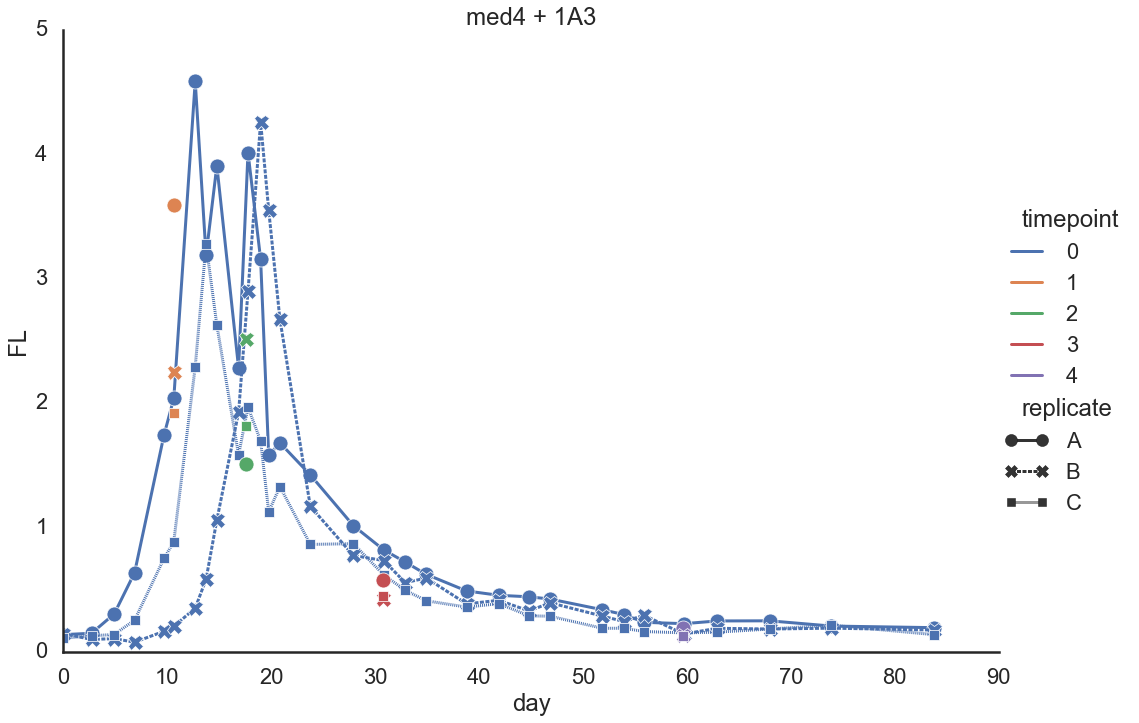

In [19]:
sns.relplot(data=df.loc[df.treatment.isin(['co-culture'])]
            , x='day', y='FL', 
            style='replicate', markers=True, 
            estimator=None, units='Sample',
            hue='timepoint', markersize=15,
           kind='line', #ci='sd'
            height=10, aspect=1.4,
           )
plt.title('med4 + 1A3')

Text(0.5, 1.0, 'CC1A3 Culture Fluorescence')

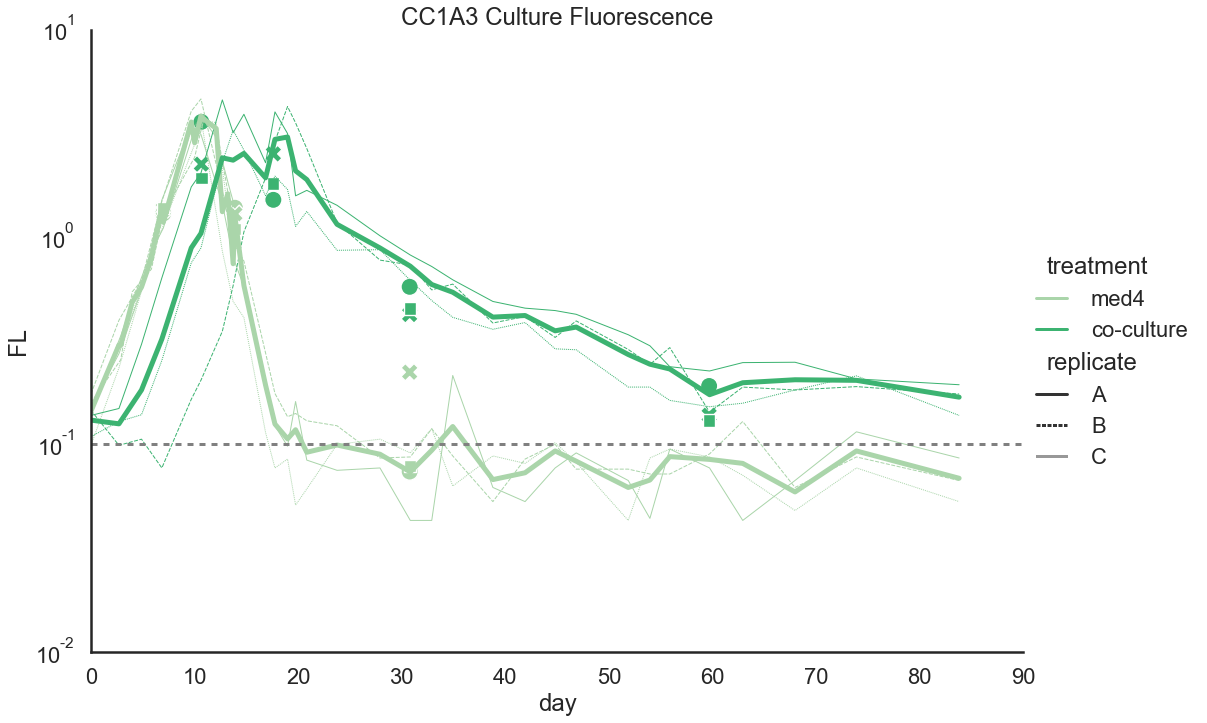

In [20]:
sns.relplot(data=df.loc[df.treatment.isin(['med4','co-culture']) & df.timepoint.isin(['0', '7'])]
            , x='day', y='FL', 
            style='replicate', 
            #markers=True, 
            estimator=None, units='Sample',
            hue='treatment', markersize=5,
            #size='omics',
            hue_order=torder, palette=tpal,
            lw=1,
           kind='line', ci='sd',
            height=10, aspect=1.4,
            #legend=False
           )
sns.lineplot(data=df.loc[df.treatment.isin(['med4','co-culture']) & df.timepoint.isin(['0', '7'])]
            , x='day', y='FL', 
            hue='treatment', 
            hue_order=torder, palette=tpal,
            lw=5, ci=None,
            legend=False
           )
sns.scatterplot(data=df.loc[df.treatment.isin(['med4','co-culture']) & df.omics.isin([True])]
            , x='day', y='FL', 
            hue_order=torder, palette=tpal,
            style='replicate', 
            hue='treatment', s=300,
                legend=False
           )

plt.xlim(0,90)
#plt.ylim(0,5)
plt.axhline(1e-1, color='grey', linestyle='--')   

plt.yscale('log')

plt.title('CC1A3 Culture Fluorescence')

(0.04, 1)

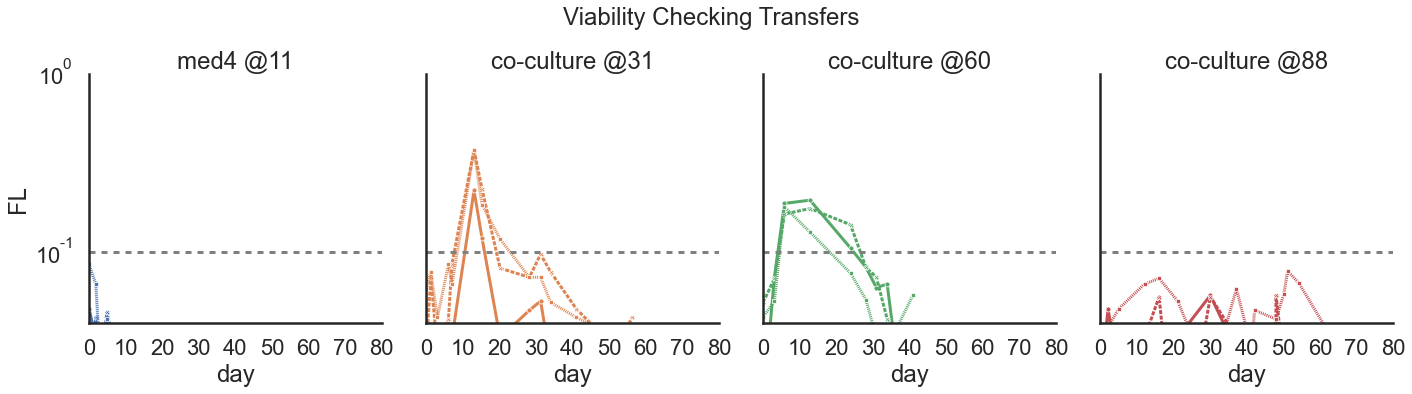

In [21]:

g = sns.relplot(data=trans_df, # .loc[trans_df.name != 'med4 @11'],
            x='day', y='FL', 
            style='replicate', markers=True, 
            estimator=None, units='Sample',
            hue='name', markersize=5,
           kind='line', #ci='sd'
            #height=10, 
            aspect=1,
            col='name', legend=False
            
           ).set_titles('{col_name}')
for ax in g.axes.flat:
    ax.axhline(1e-1, color='grey', linestyle='--')   

plt.suptitle('Viability Checking Transfers', y=1.05)
plt.yscale('log')
plt.ylim(0.04, 1)

# FCM results

In [22]:
os.listdir()

['.ipynb_checkpoints', 'cc1A3 notebook.ipynb', 'data']

In [23]:
problematic_samples = ['P0A-d33-sybr', 'A0B-d15-sybr', 'C0C-d15-sybr', 'P0A-d33', 'C0C-d15', 'P7A-d6-sybr', 'P7A-d6']


In [24]:
fcm_nosybr = pd.read_csv(os.path.join('data', 'CC1A3_FCM_PRO_nosybr.csv'))
fcm_sybr = pd.read_csv(os.path.join('data', 'CC1A3_FCM_sybr.csv'))

In [25]:
fcm_nosybr.head()

,sample_id,condition,bottle,replicate,patient_id,Day,batch,day_bin,PRO_nosybr,events
0,C0A-d10,C,0,A,C0A,10,25_1_specimen2,"(5,10]",1.530643e+07,5120
1,C0A-d11,C,0,A,C0A,11,25_1_specimen2,"(10,20]",3.311211e+07,11076
2,C0A-d13,C,0,A,C0A,13,25_1_specimen2,"(10,20]",4.237369e+07,14174
3,C0A-d14,C,0,A,C0A,14,25_1_specimen3,"(10,20]",4.435268e+07,15091
4,C0A-d15,C,0,A,C0A,15,25_1_specimen3,"(10,20]",6.830272e+07,23240


In [26]:
fcm_nosybr.columns

Index(['sample_id', 'condition', 'bottle', 'replicate', 'patient_id', 'Day',
       'batch', 'day_bin', 'PRO_nosybr', 'events'],
      dtype='object')

In [27]:
d1 = fcm_nosybr.loc[fcm_nosybr.condition.isin(['P', 'C']), [
    'sample_id', 'condition', 'bottle',
    'replicate', 'patient_id', 'Day',
    'PRO_nosybr', 'events', ]
              ].rename(columns={'PRO_nosybr': 'cells/ml', 'bottle': 'timepoint',
                               'patient_id': 'Sample'
                               })
d1['Strain'] = 'med4'
d1['group'] = d1.condition.map({'P': 'med4 (AX)', 'C': 'med4 (CC)'})

In [28]:
d2 = fcm_sybr.loc[fcm_sybr.cluster_id.isin(['ALT']) & fcm_sybr.condition.isin(['A', 'C']), [
     'sample_id', 'condition', 'bottle',
       'replicate', 'patient_id', 'Day',
        'cells', 'Freq', ]
              ].rename(columns={'cells': 'cells/ml', 'Freq' : 'events', 'bottle': 'timepoint',
                               'patient_id': 'Sample'
                               })           
d2['Strain'] = 'HOT1A3'
d2['group'] = d2.condition.map({'A': '1A3 (AX)', 'C': '1A3 (CC)'})


In [29]:
d3 = fcm_sybr.loc[fcm_sybr.cluster_id.isin(['PROhigh']) #& fcm_sybr.condition.isin(['A', 'C'])
                  , [
     'sample_id', 'condition', 'bottle',
       'replicate', 'patient_id', 'Day',
        'cells', 'Freq', ]
              ].rename(columns={'cells': 'cells/ml', 'Freq' : 'events', 'bottle': 'timepoint',
                               'patient_id': 'Sample'
                               })           
d3['Strain'] = 'PROhigh'
d3['group'] = d3.condition.map({'A': 'PROhigh (A)', 'C': 'PROhigh (C)', 'P' : 'PROhigh (P)'})


In [30]:
fcm_df = pd.concat([d1, d2])

In [31]:
fcm_df['omics'] = False
fcm_df.loc[fcm_df.timepoint.isin([3,4,5,6]), 'omics'] = True
fcm_df.loc[fcm_df.timepoint.isin([1,2]) & fcm_df.condition.isin(['A', 'C']), 'omics'] = True
fcm_df.loc[(fcm_df.timepoint  == 7) & (fcm_df.Day >13.5), 'omics'] = True
fcm_df.loc[(fcm_df.timepoint  == 0) & (fcm_df.Day >88), 'omics'] = True



In [32]:
fcm_df = fcm_df.reset_index()

Text(0.5, 1.0, 'CC1A3 Culture FCM cell counts')

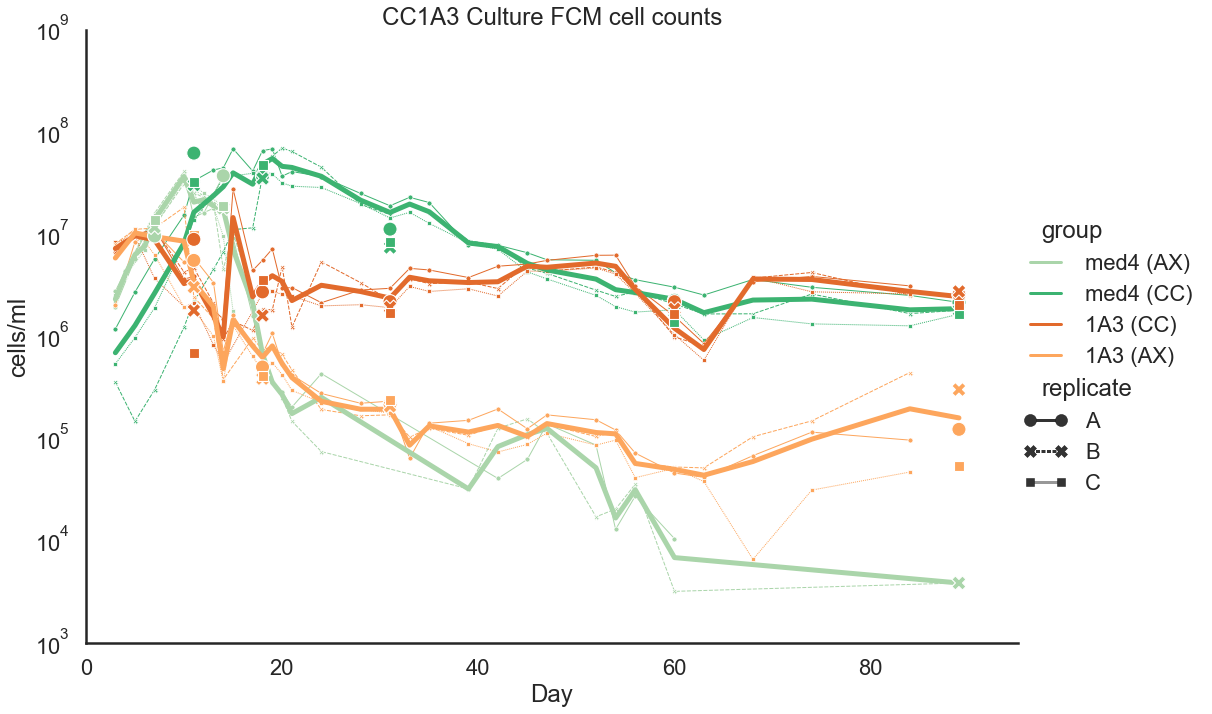

In [33]:

sns.relplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7, 5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='cells/ml', 
            style='replicate', 
            markers=True, 
            estimator=None, units='Sample',
            hue='group', markersize=5,
            #size='omics',
            hue_order=forder, palette=fpal,
            lw=1,
           kind='line', ci='sd',
            height=10, aspect=1.4,
            #legend=False
           )
sns.lineplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7,5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='cells/ml', 
            hue='group', markersize=5,
            # estimator=None,
            hue_order=forder, palette=fpal, ci=None,
            lw=5,
            legend=False
           )
sns.scatterplot(data=fcm_df.loc[fcm_df.omics.isin([True])& (fcm_df.events > 40)]
            , x='Day', y='cells/ml', 
            hue_order=forder, palette=fpal,
            style='replicate', 
            hue='group', s=200,
                zorder=20,
                legend=False
           )

plt.xlim(0,95)
#plt.ylim(0,5)

plt.yscale('log')

plt.title('CC1A3 Culture FCM cell counts')

C:\Users\Osnat\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


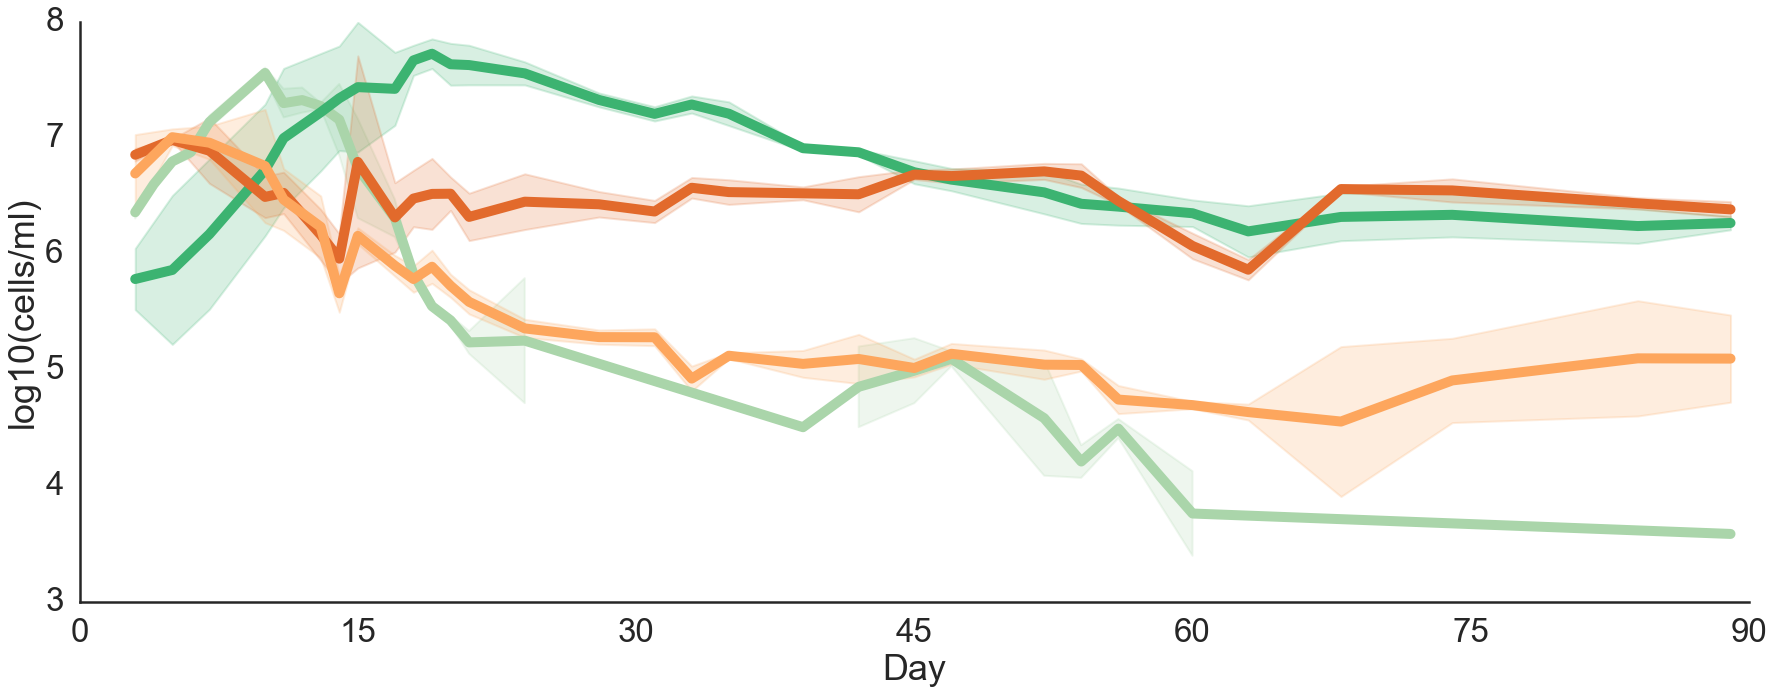

In [34]:
sns.set_context('poster', font_scale=1.5)
fcm_df['log10(cells/ml)'] = np.log10(fcm_df['cells/ml'])
sns.relplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7, 5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='log10(cells/ml)', 
            #style='replicate', 
            #markers=True, 
            #estimator=None, units='Sample',
            hue='group', #markersize=5,
            #size='omics',
            hue_order=forder, palette=fpal,
            lw=10,
           kind='line', ci='sd',
            height=10, aspect=2.5,
            legend=False
           ).set(xticks=[0,15,30,45,60,75,90])
# sns.lineplot(data=fcm_df.loc[
#     fcm_df.timepoint.isin([0, 7,5]) & 
#     (fcm_df.events > 40) & 
#     (~fcm_df.sample_id.isin(problematic_samples))
#                            ]
#             , x='Day', y='cells/ml', 
#             hue='group', markersize=5,
#             # estimator=None,
#             hue_order=forder, palette=fpal, ci=None,
#             lw=5,
#             legend=False
#            )
# sns.scatterplot(data=fcm_df.loc[fcm_df.omics.isin([True])& (fcm_df.events > 40)]
#             , x='Day', y='cells/ml', 
#             hue_order=forder, palette=fpal,
#             style='replicate', 
#             hue='group', s=200,
#                 zorder=20,
#                 legend=False
#            )

#plt.xlim(0,95)
#plt.ylim(0,5)

#plt.yscale('log')

#plt.title('Grot')

Text(0.5, 1.0, 'CC1A3 Culture FCM cell counts')

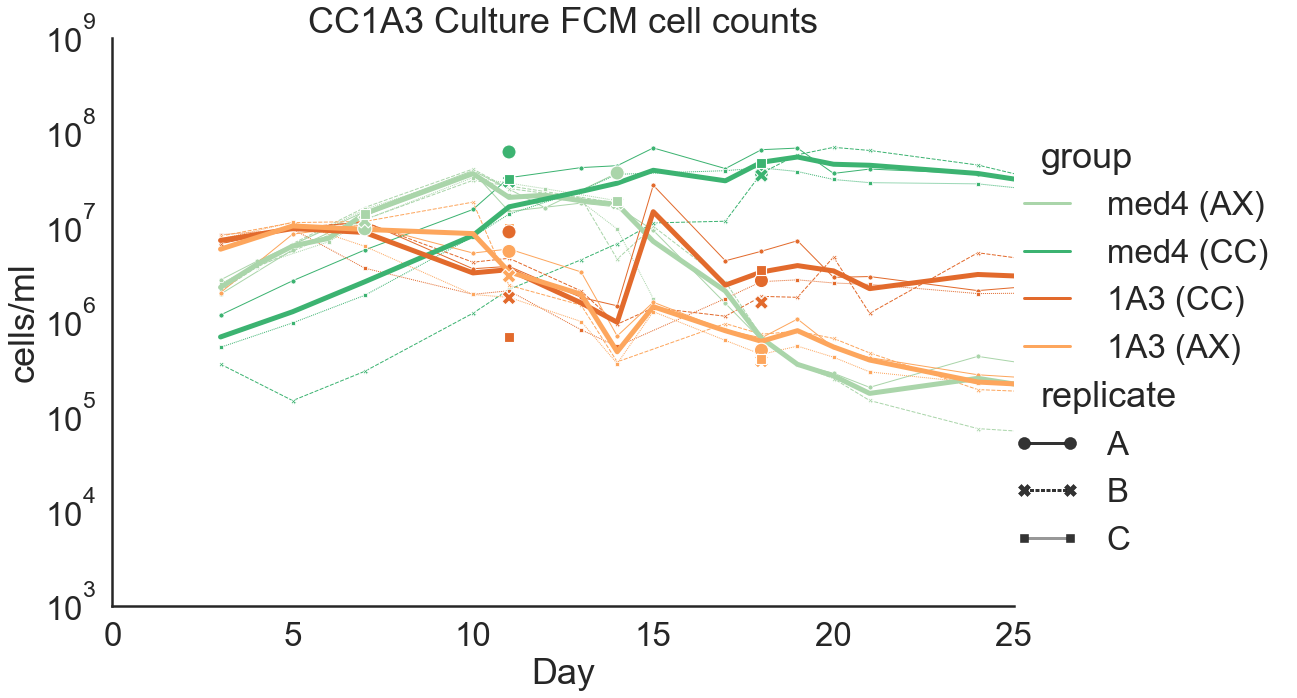

In [35]:

sns.relplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7, 5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='cells/ml', 
            style='replicate', 
            markers=True, 
            estimator=None, units='Sample',
            hue='group', markersize=5,
            #size='omics',
            hue_order=forder, palette=fpal,
            lw=1,
           kind='line', ci='sd',
            height=10, aspect=1.4,
            #legend=False
           )
sns.lineplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7,5]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='cells/ml', 
            hue='group', markersize=5,
            # estimator=None,
            hue_order=forder, palette=fpal, ci=None,
            lw=5,
            legend=False
           )
sns.scatterplot(data=fcm_df.loc[fcm_df.omics.isin([True])& (fcm_df.events > 40)]
            , x='Day', y='cells/ml', 
            hue_order=forder, palette=fpal,
            style='replicate', 
            hue='group', s=200,
                zorder=20,
                legend=False
           )

plt.xlim(0,25)
#plt.ylim(0,5)

plt.yscale('log')

plt.title('CC1A3 Culture FCM cell counts')

In [36]:
fcm_df.index, d3.index

(RangeIndex(start=0, stop=437, step=1),
 Int64Index([   4,   11,   14,   19,   25,   30,   39,   43,   49,   59,
             ...
             1943, 1949, 1952, 1959, 1963, 1973, 1976, 1981, 1989, 1995],
            dtype='int64', length=333))

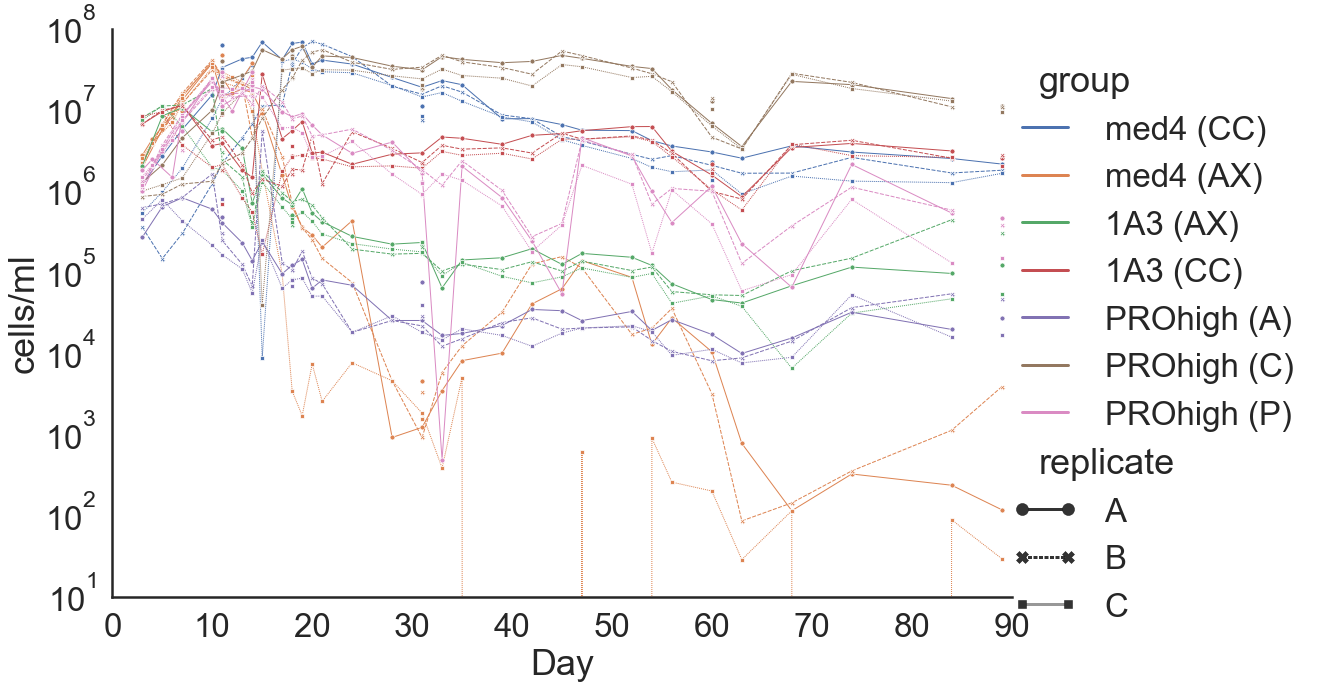

In [37]:
sns.relplot(data=pd.concat([fcm_df, d3]).reset_index()
            , x='Day', y='cells/ml', 
            style='replicate', 
            markers=True, 
            estimator=None, units='Sample',
            hue='group', markersize=5,
            #size='omics',
            #hue_order=forder, palette=fpal,
            lw=1,
           kind='line', ci='sd',
            height=10, aspect=1.4,
            #legend=False
           )
plt.yscale('log')

In [38]:
fcm_df.head()

,index,sample_id,condition,timepoint,replicate,Sample,Day,cells/ml,events,Strain,group,omics,log10(cells/ml)
0,0,C0A-d10,C,0,A,C0A,10,1.530643e+07,5120,med4,med4 (CC),False,7.184874
1,1,C0A-d11,C,0,A,C0A,11,3.311211e+07,11076,med4,med4 (CC),False,7.519987
2,2,C0A-d13,C,0,A,C0A,13,4.237369e+07,14174,med4,med4 (CC),False,7.627096
3,3,C0A-d14,C,0,A,C0A,14,4.435268e+07,15091,med4,med4 (CC),False,7.646920
4,4,C0A-d15,C,0,A,C0A,15,6.830272e+07,23240,med4,med4 (CC),False,7.834438


In [39]:
fcm_df['log cells/ml'] = np.log10(fcm_df['cells/ml'])

C:\Users\Osnat\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [40]:
fcm_df.loc[fcm_df.Day > 60].groupby(['group']) ['cells/ml'].agg(['mean', 'std'])

,mean,std
group,,
1A3 (AX),1.109953e+05,1.156464e+05
1A3 (CC),2.629984e+06,1.146653e+06
med4 (AX),4.928169e+02,9.785249e+02
med4 (CC),1.987555e+06,7.257921e+05


In [41]:
fcm_df.loc[fcm_df.group.isin(['1A3 (CC)'])].nsmallest(10, 'cells/ml')

,index,sample_id,condition,timepoint,replicate,Sample,Day,cells/ml,events,Strain,group,omics,log10(cells/ml),log cells/ml
396,997,C0C-d15-sybr,C,0,C,C0C,15,1.665015e+05,42,HOT1A3,1A3 (CC),False,5.221418,5.221418
395,992,C0C-d14-sybr,C,0,C,C0C,14,5.470763e+05,138,HOT1A3,1A3 (CC),False,5.738048,5.738048
417,1122,C0C-d63-sybr,C,0,C,C0C,63,5.813528e+05,159,HOT1A3,1A3 (CC),False,5.764440,5.764440
424,1167,C1C-d11-sybr,C,1,C,C1C,11,6.887160e+05,177,HOT1A3,1A3 (CC),True,5.838040,5.838040
387,943,C0B-d63-sybr,C,0,B,C0B,63,7.934186e+05,217,HOT1A3,1A3 (CC),False,5.899502,5.899502
394,984,C0C-d13-sybr,C,0,C,C0C,13,8.210117e+05,211,HOT1A3,1A3 (CC),False,5.914349,5.914349
357,763,C0A-d63-sybr,C,0,A,C0A,63,8.482633e+05,232,HOT1A3,1A3 (CC),False,5.928531,5.928531
365,812,C0B-d14-sybr,C,0,B,C0B,14,9.395441e+05,237,HOT1A3,1A3 (CC),False,5.972917,5.972917
386,937,C0B-d60-sybr,C,0,B,C0B,60,9.872029e+05,270,HOT1A3,1A3 (CC),False,5.994406,5.994406
416,1119,C0C-d60-sybr,C,0,C,C0C,60,1.038391e+06,284,HOT1A3,1A3 (CC),False,6.016361,6.016361


In [42]:
fcm_df.loc[fcm_df.group.isin(['1A3 (AX)'])].nsmallest(80, 'cells/ml')

,index,sample_id,condition,timepoint,replicate,Sample,Day,cells/ml,events,Strain,group,omics,log10(cells/ml),log cells/ml
316,520,A0C-d68-sybr,A,0,C,A0C,68,6.544790e+03,179,HOT1A3,1A3 (AX),False,3.815896,3.815896
318,531,A0C-d74-sybr,A,0,C,A0C,74,3.121718e+04,654,HOT1A3,1A3 (AX),False,4.494394,4.494394
315,510,A0C-d63-sybr,A,0,C,A0C,63,3.787934e+04,1036,HOT1A3,1A3 (AX),False,4.578402,4.578402
313,500,A0C-d56-sybr,A,0,C,A0C,56,4.127971e+04,1129,HOT1A3,1A3 (AX),False,4.615737,4.615737
255,151,A0A-d63-sybr,A,0,A,A0A,63,4.157221e+04,1137,HOT1A3,1A3 (AX),False,4.618803,4.618803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,31,A0A-d17-sybr,A,0,A,A0A,17,8.166501e+05,206,HOT1A3,1A3 (AX),False,5.912036,5.912036
265,215,A0B-d17-sybr,A,0,B,A0B,17,9.554014e+05,241,HOT1A3,1A3 (AX),False,5.980186,5.980186
292,372,A0C-d13-sybr,A,0,C,A0C,13,1.003891e+06,258,HOT1A3,1A3 (AX),False,6.001687,6.001687
237,42,A0A-d19-sybr,A,0,A,A0A,19,1.066386e+06,253,HOT1A3,1A3 (AX),False,6.027914,6.027914


Text(0.5, 1.0, 'CC1A3 Culture FCM cell counts')

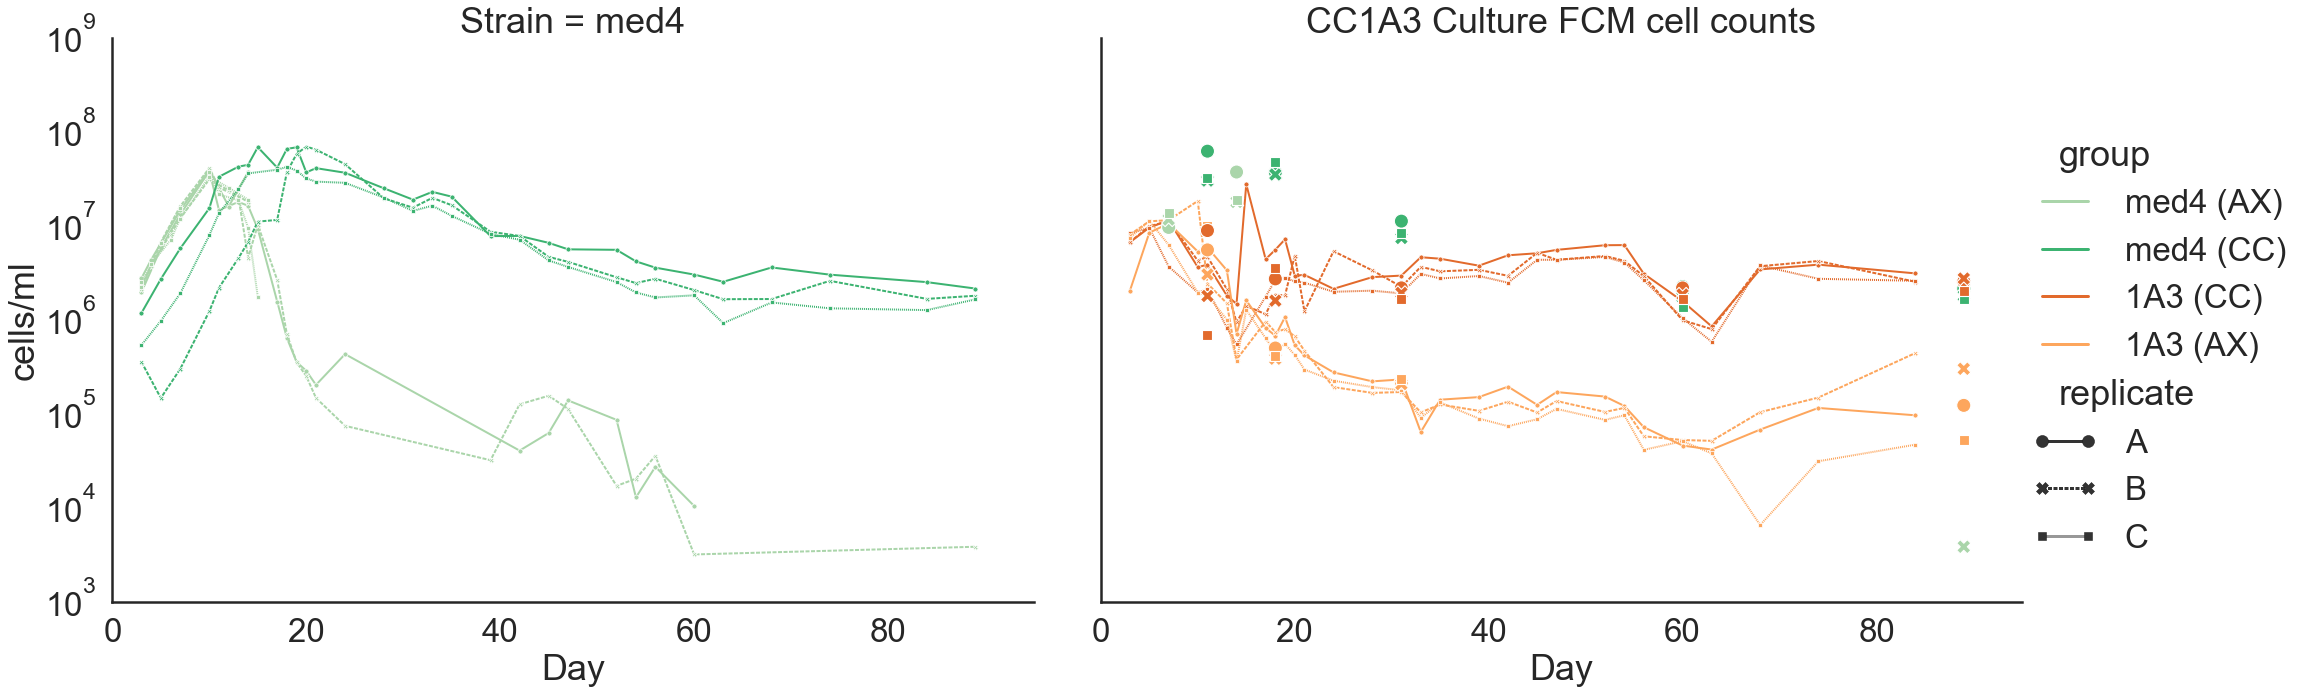

In [43]:

sns.relplot(data=fcm_df.loc[
    fcm_df.timepoint.isin([0, 7]) & 
    (fcm_df.events > 40) & 
    (~fcm_df.sample_id.isin(problematic_samples))
                           ]
            , x='Day', y='cells/ml', 
            style='replicate', 
            markers=True, 
            estimator=None, units='Sample',
            hue='group', markersize=5,
            #size='omics',
            hue_order=forder, palette=fpal,
            lw=2,
           kind='line', ci='sd',
            height=10, aspect=1.4, col='Strain',
            #legend=False
           )
sns.scatterplot(data=fcm_df.loc[fcm_df.omics.isin([True])& (fcm_df.events > 40)]
            , x='Day', y='cells/ml', 
            hue_order=forder, palette=fpal,
            style='replicate', 
            hue='group', s=200,
                zorder=20,
                legend=False
           )

plt.xlim(0,95)
#plt.ylim(0,5)

plt.yscale('log')

plt.title('CC1A3 Culture FCM cell counts')

In [44]:
fcm_df.group.unique()

array(['med4 (CC)', 'med4 (AX)', '1A3 (AX)', '1A3 (CC)'], dtype=object)

In [45]:
fcm_df.loc[(fcm_df.Day > 60) & fcm_df.group.isin(['1A3 (CC)'])].nsmallest(10, 'cells/ml')

,index,sample_id,condition,timepoint,replicate,Sample,Day,cells/ml,events,Strain,group,omics,log10(cells/ml),log cells/ml
417,1122,C0C-d63-sybr,C,0,C,C0C,63,5.813528e+05,159,HOT1A3,1A3 (CC),False,5.764440,5.764440
387,943,C0B-d63-sybr,C,0,B,C0B,63,7.934186e+05,217,HOT1A3,1A3 (CC),False,5.899502,5.899502
357,763,C0A-d63-sybr,C,0,A,C0A,63,8.482633e+05,232,HOT1A3,1A3 (CC),False,5.928531,5.928531
436,1238,C5C-d89-sybr,C,5,C,C5C,89,2.038186e+06,427,HOT1A3,1A3 (CC),True,6.309244,6.309244
391,971,C0B-d84-sybr,C,0,B,C0B,84,2.529833e+06,530,HOT1A3,1A3 (CC),False,6.403092,6.403092
434,1226,C5A-d89-sybr,C,5,A,C5A,89,2.548926e+06,534,HOT1A3,1A3 (CC),True,6.406357,6.406357
421,1146,C0C-d84-sybr,C,0,C,C0C,84,2.591885e+06,543,HOT1A3,1A3 (CC),False,6.413616,6.413616
420,1140,C0C-d74-sybr,C,0,C,C0C,74,2.720764e+06,570,HOT1A3,1A3 (CC),False,6.434691,6.434691
435,1230,C5B-d89-sybr,C,5,B,C5B,89,2.739857e+06,574,HOT1A3,1A3 (CC),True,6.437728,6.437728
361,787,C0A-d84-sybr,C,0,A,C0A,84,3.107399e+06,651,HOT1A3,1A3 (CC),False,6.492397,6.492397
